In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\phase-2 data\data-2\raw.githubusercontent.com_dsrscientist_Dataset2_main_temperature.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#droping value which has all rows nan value
data.drop(columns=['station','Date'],axis=1,inplace=True)

In [4]:
data.shape

(7752, 23)

In [5]:
data.isna().sum()  #checking null values

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
data = data.dropna().reset_index()

In [7]:
data.isna().sum()  #checking null values

index               0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
data.head()

,index,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7590 non-null   int64  
 1   Present_Tmax      7590 non-null   float64
 2   Present_Tmin      7590 non-null   float64
 3   LDAPS_RHmin       7590 non-null   float64
 4   LDAPS_RHmax       7590 non-null   float64
 5   LDAPS_Tmax_lapse  7590 non-null   float64
 6   LDAPS_Tmin_lapse  7590 non-null   float64
 7   LDAPS_WS          7590 non-null   float64
 8   LDAPS_LH          7590 non-null   float64
 9   LDAPS_CC1         7590 non-null   float64
 10  LDAPS_CC2         7590 non-null   float64
 11  LDAPS_CC3         7590 non-null   float64
 12  LDAPS_CC4         7590 non-null   float64
 13  LDAPS_PPT1        7590 non-null   float64
 14  LDAPS_PPT2        7590 non-null   float64
 15  LDAPS_PPT3        7590 non-null   float64
 16  LDAPS_PPT4        7590 non-null   float64


In [10]:
data.describe()

,index,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,...,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000,7590.000000
mean,3860.189592,29.748116,23.195125,56.725610,88.358480,29.619723,23.511374,7.095487,62.502465,0.368541,...,0.483460,0.277021,0.267497,37.544794,126.991417,61.931426,1.260118,5343.676114,30.240975,22.910198
std,2233.468996,2.970487,2.405675,14.638640,7.207666,2.948107,2.345718,2.183869,33.737553,0.262349,...,1.759916,1.159786,1.194419,0.050445,0.079249,54.346782,1.373369,429.948182,3.116472,2.486762
min,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,1937.250000,27.800000,21.600000,45.960060,84.203716,27.673584,22.086632,5.675345,37.206063,0.146544,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.840942,28.200000,21.300000
50%,3844.500000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,5782.750000,32.000000,24.800000,67.116507,93.743328,31.711219,25.155860,8.029139,84.239741,0.574550,...,0.017824,0.007856,0.000018,37.577600,127.042000,59.832400,1.767800,5729.485840,32.600000,24.600000
max,7751.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [11]:
data['Next_Tmax'].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5, 32.8, 33.7, 33.2, 32.9,
       34.1, 34.9, 35.3, 34.6, 35. , 33.9, 33.8, 34.4, 35.6, 35.1, 34.2,
       36. , 35.5, 35.2, 34.7, 35.4, 21.6, 23.5, 24.4, 24. , 35.9, 36.1,
       22.5, 22.8, 36.2, 35.8, 21.1, 23.3, 22. , 22.7, 20.9, 22.2, 22.1,
       37. , 36.9, 22.9, 35.7, 37.1, 22.3, 22.6, 37

In [12]:
# all  are numerical data
# no null values
# data looks good therw is no outliers

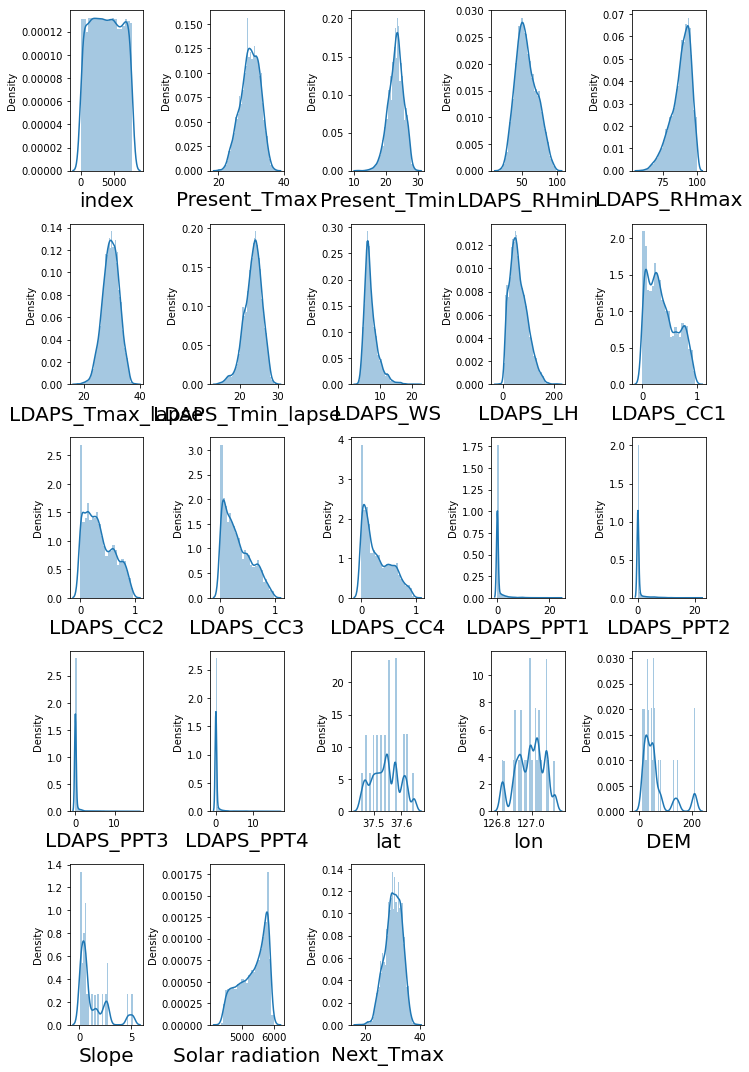

In [13]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in data:
    if plotnumber<=23:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [14]:
data.skew() #cheking skewness

index               0.013040
Present_Tmax       -0.258173
Present_Tmin       -0.363848
LDAPS_RHmin         0.301392
LDAPS_RHmax        -0.849594
LDAPS_Tmax_lapse   -0.226062
LDAPS_Tmin_lapse   -0.576782
LDAPS_WS            1.576841
LDAPS_LH            0.669181
LDAPS_CC1           0.456982
LDAPS_CC2           0.474312
LDAPS_CC3           0.640306
LDAPS_CC4           0.664487
LDAPS_PPT1          5.375597
LDAPS_PPT2          5.772761
LDAPS_PPT3          6.445912
LDAPS_PPT4          6.770184
lat                 0.085498
lon                -0.288956
DEM                 1.720915
Slope               1.558715
Solar radiation    -0.524522
Next_Tmax          -0.339116
Next_Tmin          -0.401286
dtype: float64

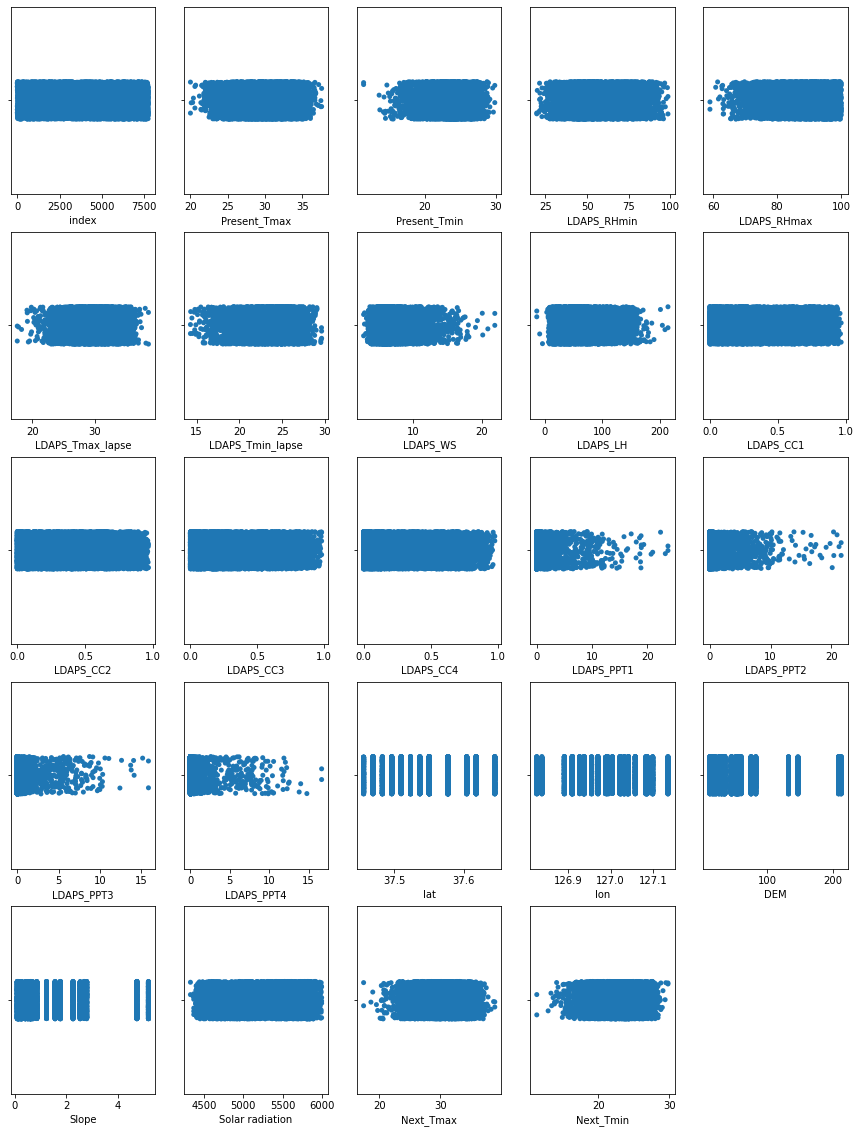

In [15]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.stripplot(data[column])
    plotnumber+=1
plt.show()    

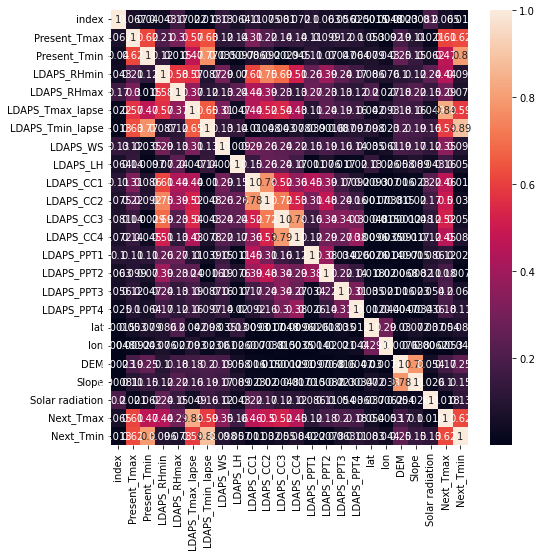

In [16]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(8,8))
sns.heatmap(relation,annot=True)
plt.show()

In [17]:
# separating features and label
x=data.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y=data['Next_Tmax']
z=['Next_Tmin']

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[-6.42521708e-02,  2.14206461e+00, -2.65078995e+00, ...,
         2.16688926e-01,  2.74797579e-02,  2.38333136e-01],
       [-1.07135524e+00,  1.87151851e-02, -6.37996857e-01, ...,
         3.31801305e-01, -7.14268551e-02,  2.60423965e-01],
       [-1.34287676e+00, -6.99854790e-01,  5.36372169e-03, ...,
         1.82401330e-01, -2.58985041e-02,  2.91278980e-01],
       ...,
       [-2.21260279e+00,  3.76953184e+00,  3.44244666e+00, ...,
        -2.58610280e-01, -1.32274308e-01,  2.64487157e-01],
       [-1.70327610e+00,  6.81761350e+00,  6.68164311e+00, ...,
         7.42950968e-01, -2.36530579e-01,  1.29135030e+00],
       [ 1.31407151e+01, -6.72594819e+00, -5.18015121e+00, ...,
        -2.92500477e-01, -2.32115005e-02, -3.98445213e-01]])

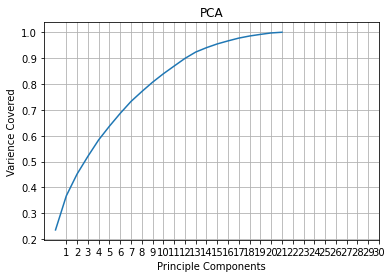

In [21]:
# scree plot
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31))
plt.xlabel('Principle Components')
plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

In [22]:
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.064252,2.142065,-2.650790,-0.057363,-0.411899,-1.515439,0.883110,-0.531900,-0.441004,0.360368,0.430197,0.830217,-0.296883
1,-1.071355,0.018715,-0.637997,-1.126077,1.065423,-1.558734,0.947216,-0.580878,-0.207833,0.527947,0.218122,0.724145,-0.432524
2,-1.342877,-0.699855,0.005364,-1.124828,0.379912,-2.178564,0.892767,0.042081,-0.000348,0.574273,0.144632,0.393643,-0.272913
3,-0.682968,0.312081,-1.910541,-0.488296,1.447046,-1.293815,0.658920,-0.998527,-0.161522,0.789984,0.159779,1.231937,-0.249693
4,-1.042152,0.262890,-0.731278,-0.826135,1.768744,-1.040624,1.151340,-0.600434,-0.408660,0.075867,-0.672185,-0.672236,-1.580994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,-2.109034,4.026550,3.136665,-1.209985,-0.029031,1.813614,-0.797379,0.724821,0.328573,-0.607264,0.753700,0.449853,0.538488
7586,-2.241972,3.800046,3.301068,-1.209225,-0.444908,1.364743,-0.852828,1.160810,0.374793,-0.500909,0.727418,0.273997,0.749773
7587,-2.212603,3.769532,3.442447,-1.251020,-0.564657,0.363704,-1.032469,1.764413,0.490569,-0.335203,0.708868,-0.005734,1.093968
7588,-1.703276,6.817613,6.681643,-2.663463,-2.687010,0.943245,-1.420114,1.694607,-0.497193,-0.739321,0.982779,0.972560,-0.033210


In [23]:
#training the data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

# model buliding

In [24]:
##write one funtion and call as many as time to check accuracy score of different model
def print_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=clf.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [25]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [26]:
print_score(svr,x_train,x_test,y_train,y_test, train=True) #train
print_score(svr,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========


ValueError: continuous is not supported

# same for Next_Tmin 